# Implement a feedforward neural network on mnist dataset

# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Load Dataset

In [4]:
((X_train, Y_train),(X_test, Y_test)) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

# Preprocessing

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [8]:
X_train.shape

(60000, 784)

In [9]:
X_test.shape

(10000, 784)

In [10]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

# Build and Train Model

In [12]:
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer=SGD(), metrics=["accuracy"])

In [13]:
e = 11

In [14]:
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=e, batch_size=128)

Epoch 1/11
469/469 [==============================] - 2s 5ms/step - loss: 1.5381 - accuracy: 0.6964 - val_loss: 1.0367 - val_accuracy: 0.8385
Epoch 2/11
469/469 [==============================] - 3s 7ms/step - loss: 0.8302 - accuracy: 0.8535 - val_loss: 0.6581 - val_accuracy: 0.8786
Epoch 3/11
469/469 [==============================] - 3s 7ms/step - loss: 0.5814 - accuracy: 0.8826 - val_loss: 0.5021 - val_accuracy: 0.8942
Epoch 4/11
469/469 [==============================] - 2s 4ms/step - loss: 0.4648 - accuracy: 0.8965 - val_loss: 0.4203 - val_accuracy: 0.9046
Epoch 5/11
469/469 [==============================] - 3s 7ms/step - loss: 0.3977 - accuracy: 0.9063 - val_loss: 0.3699 - val_accuracy: 0.9124
Epoch 6/11
469/469 [==============================] - 2s 4ms/step - loss: 0.3531 - accuracy: 0.9133 - val_loss: 0.3366 - val_accuracy: 0.9162
Epoch 7/11
469/469 [==============================] - 3s 7ms/step - loss: 0.3214 - accuracy: 0.9189 - val_loss: 0.3116 - val_accuracy: 0.9207
Epoch 

In [15]:
Y_pred = model.predict(X_test, batch_size=128)

79/79 [==============================] - 0s 3ms/step


In [16]:
print(classification_report(Y_test.argmax(axis=1), Y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.93      0.90      0.91      1032
           3       0.91      0.92      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.92      0.88      0.90       892
           6       0.93      0.95      0.94       958
           7       0.93      0.93      0.93      1028
           8       0.90      0.90      0.90       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



# Plot Training Loss and Accuracy

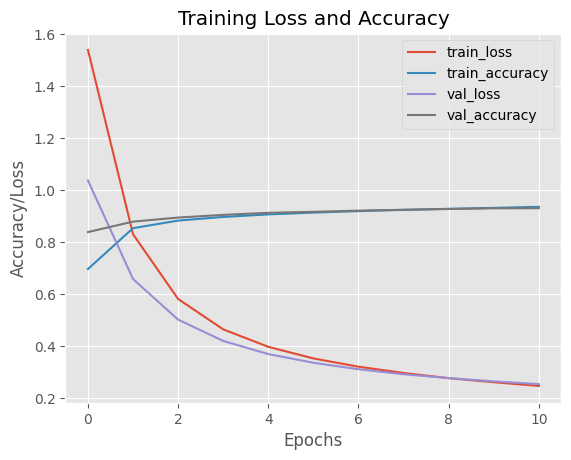

In [17]:
plt.style.use("ggplot")
plt.plot(arange(0,e), H.history["loss"], label="train_loss")
plt.plot(arange(0,e), H.history["accuracy"], label="train_accuracy")
plt.plot(arange(0,e), H.history["val_loss"], label="val_loss")
plt.plot(arange(0,e), H.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy/Loss")
plt.title("Training Loss and Accuracy")
plt.legend()